## Importing Libraries

In [1]:
import os
import math
import cv2
import PIL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import h5py
from keras import layers
from lrfinder import LRFinder
from PIL import Image, ImageOps
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
import seaborn as sns
from skimage import io

In [3]:
from tensorflow.keras.applications.resnet import ResNet50

In [4]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import MaxPooling3D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.utils import plot_model

In [5]:
import h5py
print(h5py.__version__)

2.10.0


## Data Preprocessing 

### Data Augmentation

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
input_size = (256, 256)
batch_size = 64

In [8]:
training_set = train_datagen.flow_from_directory('Data/Custom/Split/augmented_train',
                                                 target_size = input_size,
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Data/Custom/Split/validation',
                                            target_size = input_size,
                                            batch_size = batch_size,
                                            class_mode = 'categorical')


Found 1535 images belonging to 14 classes.
Found 145 images belonging to 14 classes.


In [9]:
label_map = (training_set.class_indices)
label_map

{'Aishu': 0,
 'Aswini': 1,
 'Kick': 2,
 'Nandana': 3,
 'Raji': 4,
 'Santhosh': 5,
 'Sathish': 6,
 'Sruthi': 7,
 'Suma': 8,
 'Surudhi': 9,
 'Swathi': 10,
 'Varma': 11,
 'Venky': 12,
 'Yoga': 13}

## CNN Model

In [10]:
model = Sequential([
    Conv2D(filters = 36, kernel_size = 7, activation = 'relu', input_shape = (256, 256, 3)),
    MaxPooling2D(pool_size = 2),
    Conv2D(filters = 54, kernel_size = 5, activation = 'relu'),
    MaxPooling2D(pool_size = 2),
    Conv2D(filters = 72, kernel_size = 3, activation = 'relu'),
    MaxPooling2D(pool_size = 2),
    Conv2D(filters = 90, kernel_size = 1, activation = 'relu'),
    MaxPooling2D(pool_size = 2),
    Flatten(),
    Dense(2024, activation = 'relu'),
    Dropout(0.5),
    Dense(1024, activation = 'relu'),
    Dropout(0.5),
    Dense(512, activation = 'relu'),
    Dropout(0.5),
    Dense(14, activation='softmax')  
])


2022-06-01 21:04:09.493653: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-01 21:04:09.499254: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [11]:
# K = tf.keras.backend

# BATCH = 64

# STEPS_PER_EPOCH = np.ceil(1443 / BATCH)
# lr_finder = LRFinder(model)
# lr_finder.find(training_set, start_lr=1e-6, end_lr=1, epochs=10,
#                steps_per_epoch=STEPS_PER_EPOCH)

# learning_rates = lr_finder.get_learning_rates()
# losses = lr_finder.get_losses()
# best_lr = lr_finder.get_best_lr(sma=20)

# K.set_value(model.optimizer.lr, best_lr)
# print(best_lr)

In [12]:
model.compile(optimizer = Adam(0.00075), 
              loss ="categorical_crossentropy", 
              metrics =["categorical_accuracy"])


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 250, 250, 36)      5328      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 125, 36)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 121, 121, 54)      48654     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 60, 60, 54)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 58, 58, 72)        35064     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 72)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 90)        6

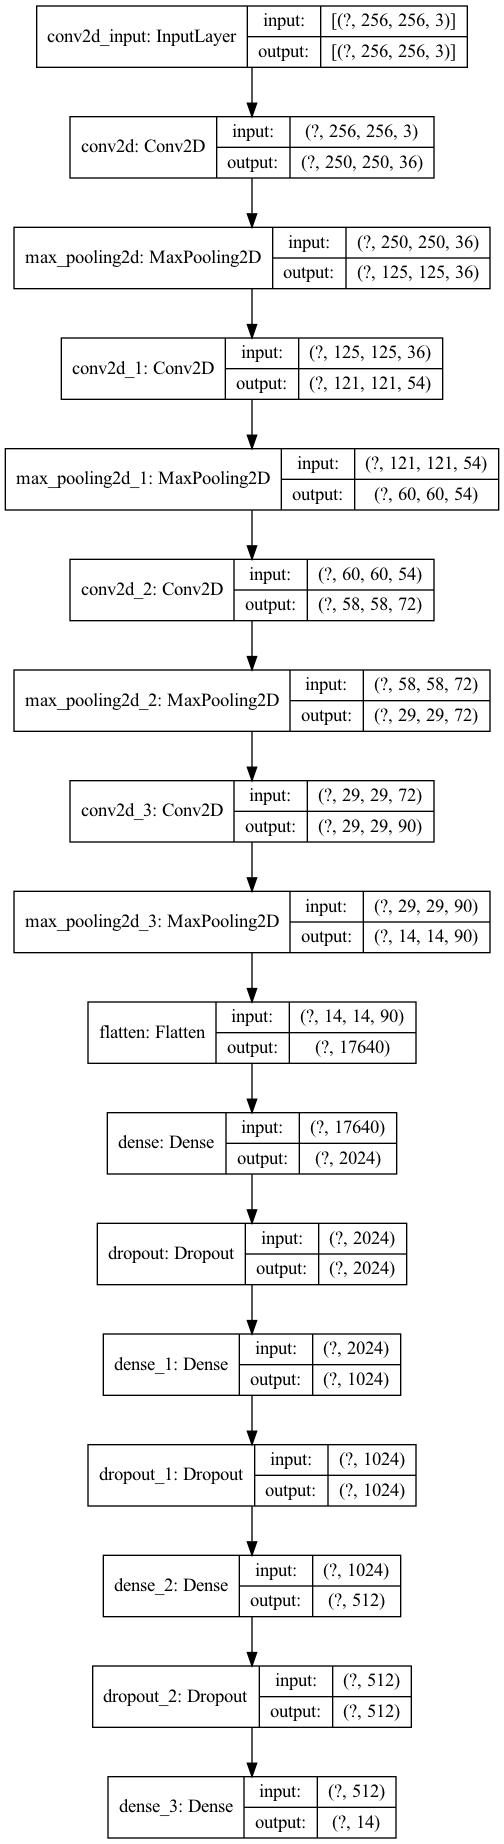

In [14]:
plot_model(model, to_file='Plots/cnn_model_plot.png', show_shapes=True, show_layer_names=True)

In [18]:
history = model.fit(training_set, epochs = 25, validation_data = test_set)

Train for 24 steps, validate for 3 steps
Epoch 1/25
24/24 [==============================] - 657s 27s/step - loss: 2.6502 - categorical_accuracy: 0.1134 - val_loss: 2.6657 - val_categorical_accuracy: 0.0690
Epoch 2/25
24/24 [==============================] - 665s 28s/step - loss: 2.5848 - categorical_accuracy: 0.1355 - val_loss: 2.6583 - val_categorical_accuracy: 0.0621
Epoch 3/25
24/24 [==============================] - 666s 28s/step - loss: 2.5664 - categorical_accuracy: 0.1329 - val_loss: 2.6613 - val_categorical_accuracy: 0.0897
Epoch 4/25
24/24 [==============================] - 637s 27s/step - loss: 2.5415 - categorical_accuracy: 0.1407 - val_loss: 2.6390 - val_categorical_accuracy: 0.0621
Epoch 5/25
24/24 [==============================] - 653s 27s/step - loss: 2.4885 - categorical_accuracy: 0.1635 - val_loss: 2.6304 - val_categorical_accuracy: 0.0966
Epoch 6/25
24/24 [==============================] - 623s 26s/step - loss: 2.3801 - categorical_accuracy: 0.2098 - val_loss: 2.502

In [19]:
model.save('Models/cnn_model.h5')

In [20]:
max(history.history['categorical_accuracy'])

0.9771987

In [21]:
best_train_accuracy = history.history['categorical_accuracy'][np.argmin(history.history['loss'])]
best_train_accuracy

0.9771987

In [22]:
max(history.history['val_categorical_accuracy'])

0.31724137

In [23]:
best_test_accuracy = history.history['val_categorical_accuracy'][np.argmin(history.history['val_loss'])]
best_test_accuracy

0.18620689

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


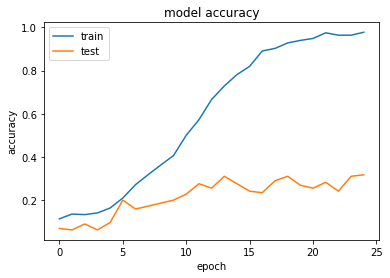

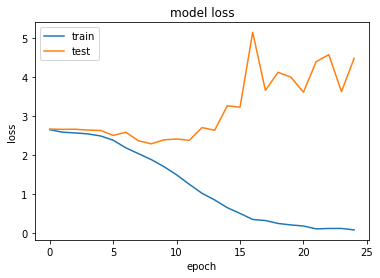

In [24]:
#list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()